In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('D:\Deep-Learning-C-B-n\House_Price\data_linear.csv').values
print(data)

[[  30.      448.524 ]
 [  32.4138  509.248 ]
 [  34.8276  535.104 ]
 [  37.2414  551.432 ]
 [  39.6552  623.418 ]
 [  42.069   625.992 ]
 [  44.4828  655.248 ]
 [  46.8966  701.377 ]
 [  49.3103  748.918 ]
 [  51.7241  757.881 ]
 [  54.1379  831.004 ]
 [  56.5517  855.409 ]
 [  58.9655  866.707 ]
 [  61.3793  902.545 ]
 [  63.7931  952.261 ]
 [  66.2069  995.531 ]
 [  68.6207 1069.78  ]
 [  71.0345 1074.42  ]
 [  73.4483 1103.88  ]
 [  75.8621 1138.69  ]
 [  78.2759 1153.13  ]
 [  80.6897 1240.27  ]
 [  83.1034 1251.9   ]
 [  85.5172 1287.97  ]
 [  87.931  1320.47  ]
 [  90.3448 1374.92  ]
 [  92.7586 1410.16  ]
 [  95.1724 1469.69  ]
 [  97.5862 1478.54  ]
 [ 100.     1515.28  ]]


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_1224\4234437930.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Deep-Learning-C-B-n\House_Price\data_linear.csv').values


Text(0, 0.5, 'giá')

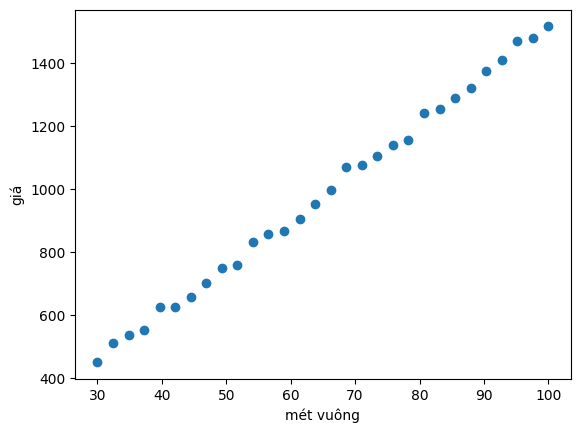

In [46]:
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [47]:
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,1.]).reshape(-1,1)

[13929872.64455245]
[10306582.37422079]
[7625999.18237673]
[5642849.69326854]
[4175675.71851866]
[3090230.83195734]
[2287196.82094014]
[1693096.06938209]
[1253568.35550934]
[928396.89128833]
[687828.48611463]
[509851.12972016]
[378179.89312088]
[280766.8575313]
[208698.72973386]
[155381.27570385]
[115935.94816237]
[86753.4994753]
[65163.7354763]
[49191.19268689]
[37374.38339803]
[28632.06953731]
[22164.32937972]
[17379.36470576]
[13839.35126131]
[11220.37783611]
[9282.80838638]
[7849.35533562]
[6788.85776037]
[6004.28016513]
[5423.83373397]
[4994.40765352]
[4676.70947326]
[4441.66984614]
[4267.78268312]
[4139.13734594]
[4043.96282366]
[3973.55068504]
[3921.4582571]
[3882.91912046]
[3854.40698198]
[3833.3130189]
[3817.70717153]
[3806.16154282]
[3797.61974572]
[3791.30024382]
[3786.62484071]
[3783.16577503]
[3780.60658031]
[3778.71312826]
[3777.31220606]
[3776.27566738]
[3775.50870698]
[3774.94118601]
[3774.52121437]
[3774.21040269]
[3773.98034975]
[3773.81004376]
[3773.68393976]
[3773.5

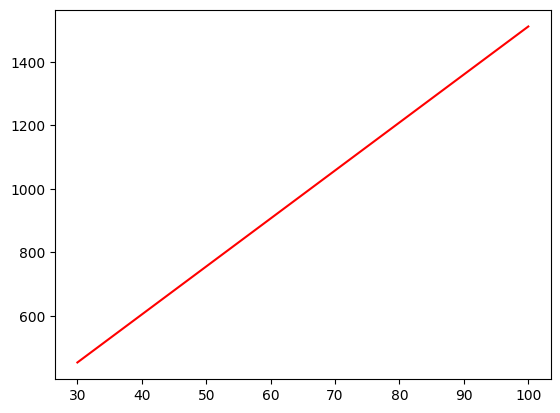

In [48]:
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()


In [49]:
x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [755.68795083]


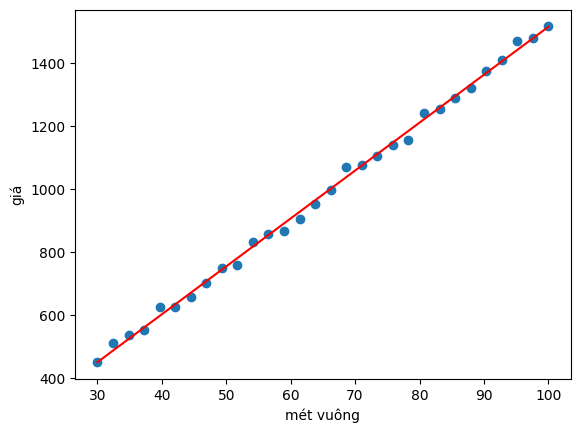

In [51]:
# Lưu w với numpy.save(), định dạng '.npy'
np.save('weight.npy', w)
# Đọc file '.npy' chứa tham số weight
w = np.load('weight.npy')
# LinearRegression với thư viện sklearn
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
# Tạo mô hình hồi quy tuyến tính
lrg = LinearRegression()
# Train mô hình với data giá đất
lrg.fit(x, y)
# Đoán giá nhà đất
y_pred = lrg.predict(x)
plt.plot((x[0], x[-1]),(y_pred[0], y_pred[-1]), 'r')
plt.show()
# Lưu nhiều tham số với numpy.savez(), định dạng '.npz'
np.savez('w2.npz', a=lrg.intercept_, b=lrg.coef_)
# Lấy lại các tham số trong file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']